<a href="https://colab.research.google.com/github/Biline-dev/IARN/blob/main/TP_3_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Réalisé par:

BOULMAALI Linda Imene 181832040766

# TP 3 Regression linéaire
Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'13l_FokcQVP1j05PdlgimRQiSH2saW3aB'}) # replace the id with id of file you want to access
downloaded.GetContentFile('data.csv') 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
m, n=data.shape

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente l'admission à la specialité (1 admis 0 non admis).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [ ]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2]
y=y.reshape(y.shape[0], 1)

In [ ]:
print('X', X.shape ,' y ', y.shape)

X (100, 3)  y  (100, 1)


# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [ ]:
def Sigmoid(z): 
    return 1/(1+np.exp(-z)) 

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [ ]:
def computeCostNonVect(X, y, theta): 
  cost = 0
  for i in range(m):
    z=0
    for j in range(n):
      z += theta[j]*X[:, j]
    cost_i = y[i]*np.log(Sigmoid(z))+ (1-y[i])*np.log(1-Sigmoid(z))
    cost += cost_i
  return -(1/m)*cost.mean(axis=0)

In [ ]:
def computeCost(X, y, theta):
  m=X.shape[0]
  k=y*np.log(Sigmoid(np.dot(X,theta)))+(1-y)*np.log(1-Sigmoid(np.dot(X,theta)))
  return -(1/m)*np.sum(k)

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [ ]:
def gradientDescent(X, y, theta, alpha, iterations):
    theta_history = []
    cost_history = []
     
    for iter in range(iterations):
      cost_history.append(computeCost(X, y, theta))
      hypothesis = Sigmoid(np.dot(X,theta))
      diff = hypothesis-y
      diff_=(X*diff)
      theta_=diff_.mean(axis=0)
      theta_=theta_.reshape(theta_.shape[0],1)
      for i in range(len(theta)):
        theta[i] = theta[i]  - (1 / m) * alpha *np.sum(diff_[:,i])
      
      theta_history.append(theta_)

    return theta,  np.array(cost_history), np.array(theta_history)

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [ ]:
n=X.shape[1]
theta = np.zeros((n, 1))
theta

array([[0.],
       [0.],
       [0.]])

Calculer le cout initial

In [ ]:
initialCost=computeCost(X, y, theta)
print(initialCost)
initialCostNonVect=computeCostNonVect(X, y, theta)
print(initialCostNonVect)

0.6931471805599453
0.693147180559946


Appel des la fonction de calcul du gradient

[0.69314718 0.65952433 0.63600153 ... 0.38778355 0.38776119 0.38773884]


Text(0, 0.5, 'cost')

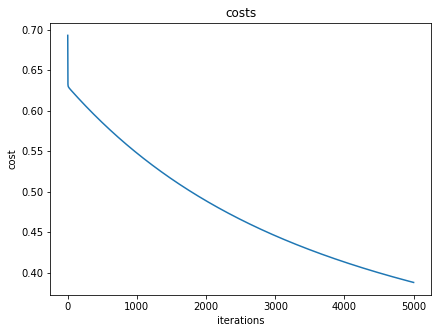

In [ ]:
n=X.shape[1]
theta = np.zeros((n, 1))
theta
# paramètres
iterations = 5000;
alpha = 0.02;
# Appel
theta, cost_history, theta_history= gradientDescent(X, y, theta, alpha, iterations);
print(cost_history)
#cost function plot
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("costs")
plt.plot(range(cost_history.shape[0]), cost_history)
plt.xlabel('iterations')
plt.ylabel('cost')

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [ ]:
def drawLine(X, theta, title=""):
    m=100
    y_pred = []
    x_list = []
    for i in range(m):
      x_list.append(X[i, 1])
      y_pred.append(-(theta[0][0]+ theta[1][0]*X[i][1]) / theta[2][0])
    plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
    plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')

    plt.title(title)
    plt.xlabel('Note module 1')
    plt.ylabel('Note module 2')

    plt.plot(x_list, y_pred, label='Decision Boundary')  

# Affichage 
Graphe representant les acceptations selon les caracteristiques

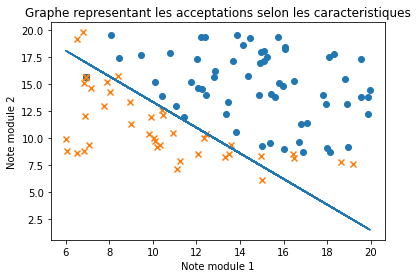

In [ ]:
drawLine(X, theta, "Graphe representant les acceptations selon les caracteristiques")

Traçage du coût en fonction de theta0 et theta1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':


(400,)


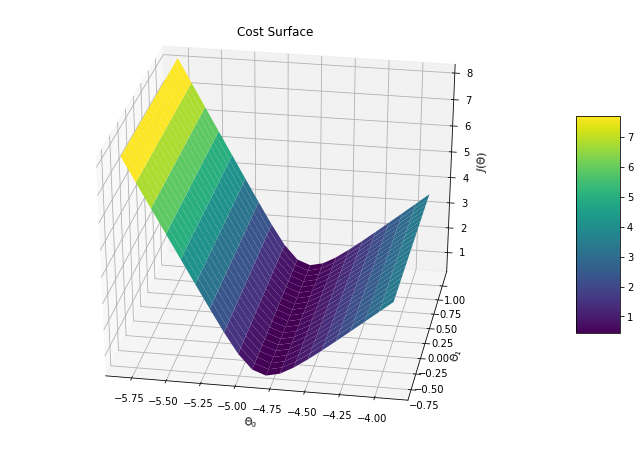

In [ ]:
theta_0, theta_1 = np.meshgrid(np.arange(theta[0] - 1, theta[0] + 1, 0.1), 
                                            np.arange(theta[1] - 1, theta[1] + 1, 0.1))
cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        k=np.array([theta_0[i].mean(axis=0), theta_1[j].mean(axis=0)])
        k=k.reshape(k.shape[0], 1)
        t = np.concatenate((k, theta[2:]), axis=0)
        cost_values[i, j] = computeCost(X, y, t)

new_array = cost_values[[np.logical_not(np.isnan(cost_values))]]
print(new_array.shape)
fig = plt.figure(figsize = (12, 8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = "viridis", linewidth = 0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.set_title("Cost Surface")
ax.view_init(30,280)

plt.show()

Prédire des valeurs de y

In [ ]:
# Predire pour des notes note1= 9 et note2=17
x = np.array([[1, 9, 17]])
x @ theta


array([[0.47142274]])

Nous avons obtenu 0.4, la valeur de y est donc 0

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [ ]:
sklearn_model_simple =LogisticRegression()
sklearn_model_simple.fit(X, y)
print("sklearn model  :", (sklearn_model_simple.coef_, sklearn_model_simple.intercept_))
print("Notre modele   :", theta[0],theta[1], theta[2] )

sklearn model  : (array([[1.17382646e-05, 9.41594015e-01, 9.16670693e-01]]), array([-22.9317941]))
Notre modele   : [-4.80200887] [0.22602013] [0.19054414]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
def comparaison_sklearn(X, y, theta):
    sklearn_model = LogisticRegression(penalty='none', max_iter=1500)
    sklearn_model.fit(X[:, 1:], y)
    
    theta_sk = np.zeros(theta.shape)
    theta_sk[1:] = sklearn_model.coef_.reshape(-1, 1)
    theta_sk[0] = sklearn_model.intercept_[0]
    theta_sk = np.reshape(theta_sk, (-1, 1))
    
    
    plt.figure(figsize=(25, 10))
    plt.subplot(1, 2, 1)
    drawLine(X,theta_sk, " sklearn Modele")
    plt.subplot(1, 2, 2)

    drawLine(X,theta, " Notre modele")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


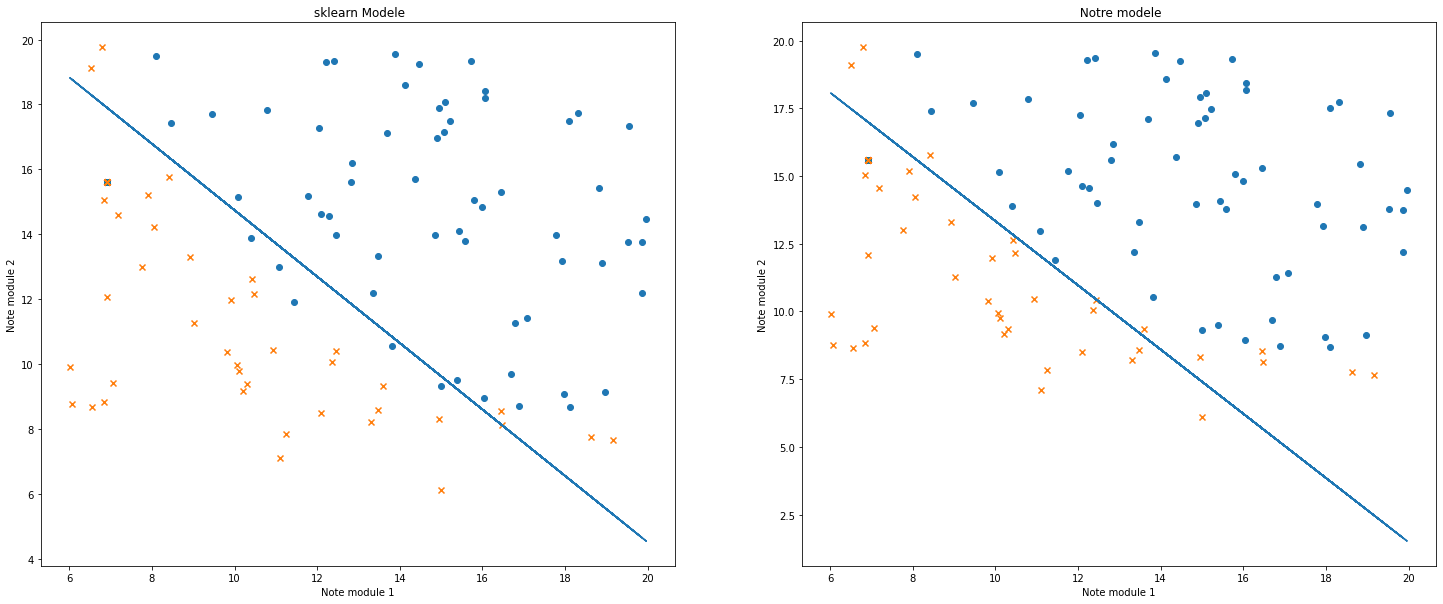

In [ ]:
comparaison_sklearn(X, y, theta)

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

In [ ]:
X_max, X_min = X[:, 1:].max(axis=0), X[:, 1:].min(axis=0)
X_normalized = (X[:, 1:] - X_min) / (X_max - X_min)
X_normalized=np.column_stack((intercept,X_normalized[:, :2]))
y_max, y_min = y.max(), y.min()
y_normalized = (y - y_max) / (y_max - y_min)

Text(0, 0.5, 'cost')

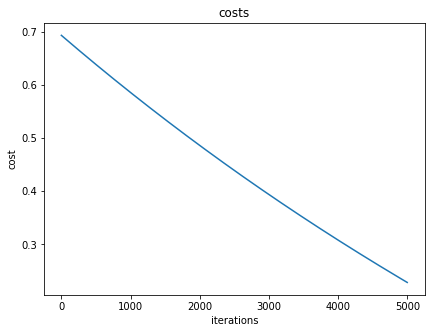

In [ ]:
# paramètres
iterations = 5000
alpha = 0.0001
theta = np.zeros((X_normalized.shape[1], 1))
# Appel
theta, cost_normalized, theta_normalized  = gradientDescent(X_normalized, y_normalized, theta, alpha, iterations)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("costs")
plt.plot(range(cost_normalized.shape[0]), cost_normalized)
plt.xlabel('iterations')
plt.ylabel('cost')

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 25 Mars 2022 à 22h


In [ ]:
# bonne chance